# Brightness

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

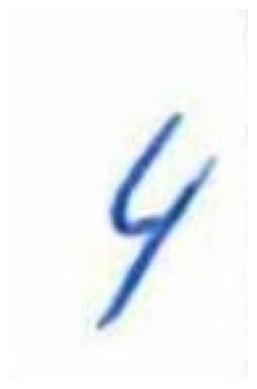

In [14]:
img = plt.imread('./standardization_symbols/Four_full (16).jpg').astype(np.uint8)
plt.axis('off')
plt.imshow(img)


In [15]:
# Increase brightness on a scale of 0-255
def increase_brightness(img, brightness=0):
    img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    img_v = img_hsv[:,:,2]
    
    img_v = np.asarray(img_v)
    img_v[img_v > 255 - brightness] = 255
    img_v[img_v <= 255 - brightness] += brightness

    h, w = img.shape[:2]

    for y in range(h):
        for x in range(w):
            img_hsv[y, x, 2] = img_v[y, x]

    rgb = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)
    

    return rgb

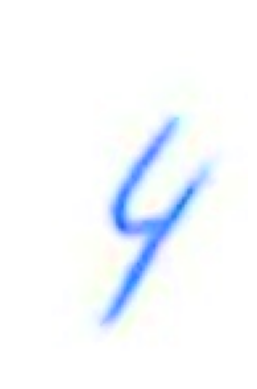

In [16]:
img_bright = increase_brightness(img, 100)
plt.axis('off')
plt.imshow(img_bright)

In [17]:
def threshold(img, threshold, display=True):
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # print(img_gray)
    
    img_gray[img_gray >= threshold] = 255
    img_gray[img_gray < threshold] = 0

    if display:
        plt.figure(figsize = [10, 10])
        plt.axis('off')
        plt.imshow(img_gray, cmap="gray")

    return img_gray

In [18]:

# threshold(img, .5)
# for i in range(1, 20):
#     threshold(img_bright, i * .01 + .1)

In [19]:
def median_threshold(img, display=True):
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # print(img_gray)
    median = np.median(img_gray)

    img_gray[img_gray >= median] = 255
    img_gray[img_gray < median] = 0

    if display:
        plt.figure(figsize = [10, 10])
        plt.axis('off')
        plt.imshow(img_gray, cmap="gray")

    return img_gray

# Results

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

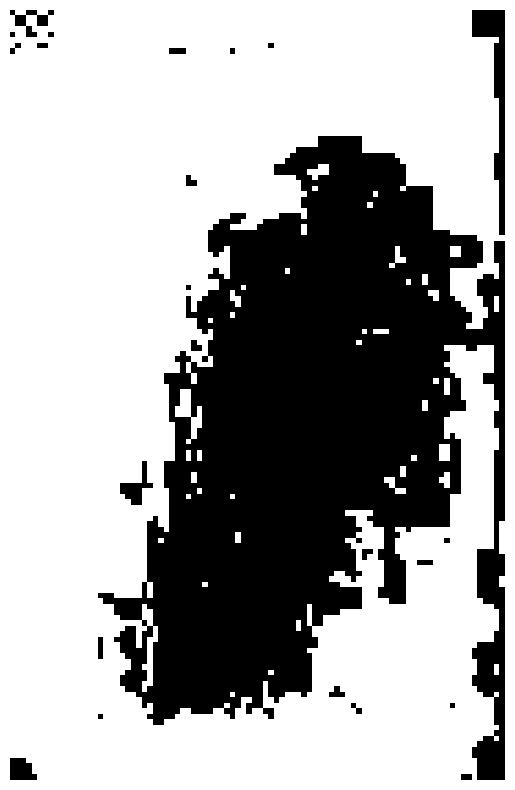

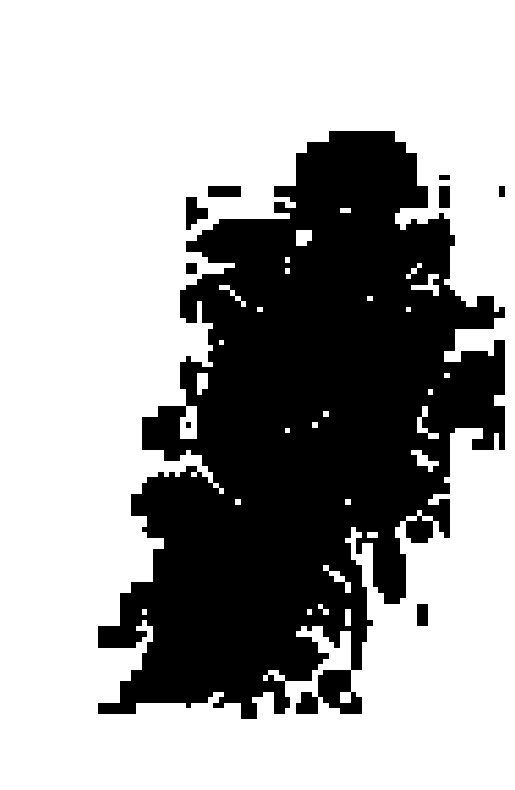

In [20]:

median_threshold(img)
median_threshold(img_bright)

In [21]:
def mean_threshold(img, display=True):
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # print(img_gray)
    mean = np.mean(img_gray)

    img_gray[img_gray >= mean] = 255
    img_gray[img_gray < mean] = 0

    if display:
        plt.figure(figsize = [10, 10])
        plt.axis('off')
        plt.imshow(img_gray, cmap="gray")

    return img_gray

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

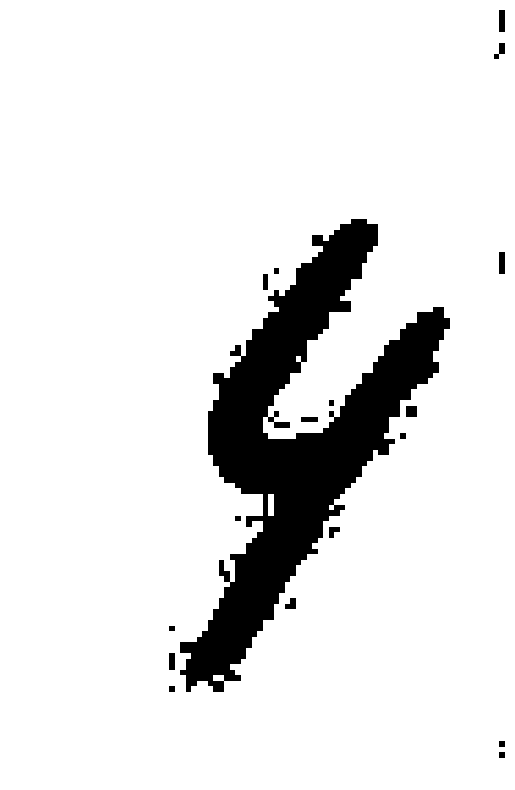

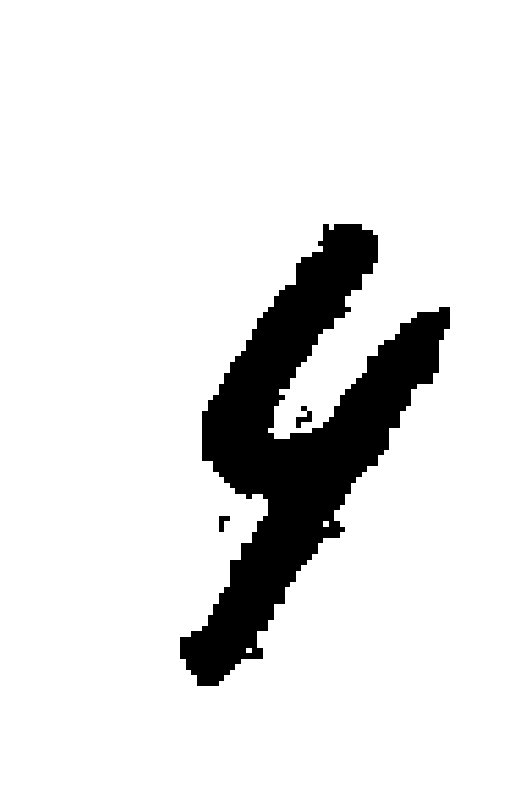

In [22]:

mean_threshold(img)
mean_threshold(img_bright)

# Uneven lighting

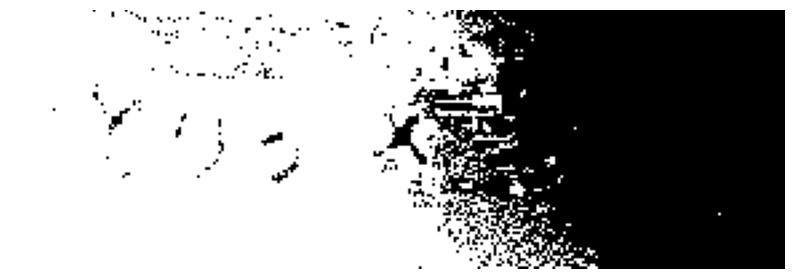

In [23]:

img = cv2.cvtColor(cv2.imread('../equation-dataset/dark-background/6.png').astype(np.uint8), cv2.COLOR_BGR2RGB)
img_bright = increase_brightness(img, 150)
img_bright = mean_threshold(img_bright)
plt.axis('off')
plt.imshow(img_bright, cmap='gray')

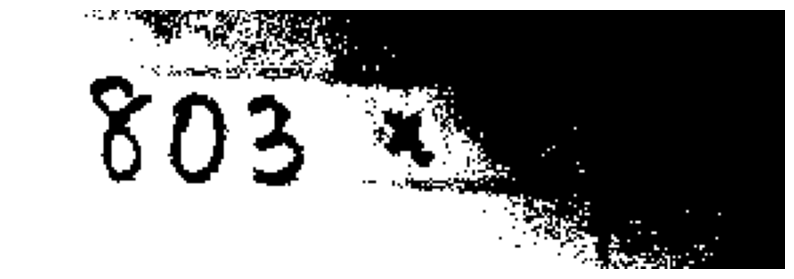

In [24]:

img = cv2.cvtColor(cv2.imread('../equation-dataset/dark-background/6.png').astype(np.uint8), cv2.COLOR_BGR2RGB)
img = mean_threshold(img)
plt.axis('off')
plt.imshow(img, cmap='gray')